In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
thyroid_df = pd.read_csv('/content/hypothyroid.csv')
thyroid_df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [3]:
thyroid_df.rename(columns={'binaryClass':'Label'},inplace=True)

In [4]:
thyroid_df.replace('?',np.nan,inplace=True)

In [5]:
thyroid_df.drop(['T3 measured','TSH measured','TT4 measured','T4U measured','FTI measured','TBG measured','TBG','referral source','on thyroxine','query on thyroxine','on antithyroid medication','query hypothyroid', 'query hyperthyroid','hypopituitary', 'psych'],axis=1,inplace=True)

In [6]:
thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              3771 non-null   object
 1   sex              3622 non-null   object
 2   sick             3772 non-null   object
 3   pregnant         3772 non-null   object
 4   thyroid surgery  3772 non-null   object
 5   I131 treatment   3772 non-null   object
 6   lithium          3772 non-null   object
 7   goitre           3772 non-null   object
 8   tumor            3772 non-null   object
 9   TSH              3403 non-null   object
 10  T3               3003 non-null   object
 11  TT4              3541 non-null   object
 12  T4U              3385 non-null   object
 13  FTI              3387 non-null   object
 14  Label            3772 non-null   object
dtypes: object(15)
memory usage: 442.2+ KB


In [7]:
thyroid_df['thyroid surgery'].value_counts()

f    3719
t      53
Name: thyroid surgery, dtype: int64

In [8]:
cols = ['age','FTI','TSH','T3','TT4','T4U']
for i in cols:
    thyroid_df[i] = pd.to_numeric(thyroid_df[i])

In [9]:
thyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3771 non-null   float64
 1   sex              3622 non-null   object 
 2   sick             3772 non-null   object 
 3   pregnant         3772 non-null   object 
 4   thyroid surgery  3772 non-null   object 
 5   I131 treatment   3772 non-null   object 
 6   lithium          3772 non-null   object 
 7   goitre           3772 non-null   object 
 8   tumor            3772 non-null   object 
 9   TSH              3403 non-null   float64
 10  T3               3003 non-null   float64
 11  TT4              3541 non-null   float64
 12  T4U              3385 non-null   float64
 13  FTI              3387 non-null   float64
 14  Label            3772 non-null   object 
dtypes: float64(6), object(9)
memory usage: 442.2+ KB


In [10]:
thyroid_df.isnull().sum()

age                  1
sex                150
sick                 0
pregnant             0
thyroid surgery      0
I131 treatment       0
lithium              0
goitre               0
tumor                0
TSH                369
T3                 769
TT4                231
T4U                387
FTI                385
Label                0
dtype: int64

In [11]:
miss_cols = ['FTI','TSH','T3','TT4','T4U']
for i in miss_cols:
    thyroid_df[i] = thyroid_df[i].fillna(thyroid_df[i].mean())

In [12]:
thyroid_df.dropna(inplace=True)

In [13]:
thyroid_df.isnull().sum()

age                0
sex                0
sick               0
pregnant           0
thyroid surgery    0
I131 treatment     0
lithium            0
goitre             0
tumor              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
Label              0
dtype: int64

In [14]:
thyroid_df = thyroid_df.drop(1364)

In [15]:
thyroid_df.TT4 = thyroid_df.TT4.astype(int)
thyroid_df.FTI = thyroid_df.FTI.astype(int)
thyroid_df.age = thyroid_df.age.astype(int)

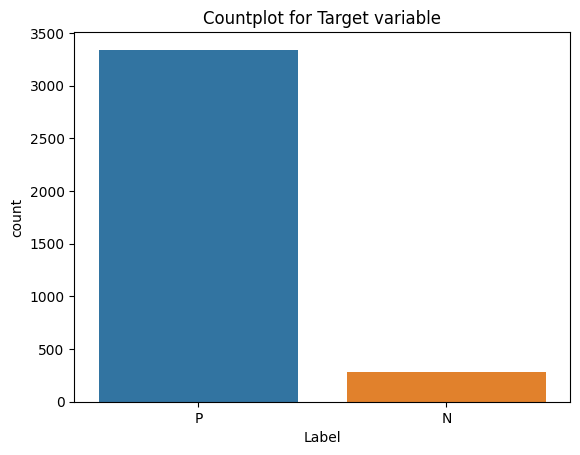

In [16]:
sns.countplot(x='Label',data=thyroid_df)
plt.title("Countplot for Target variable");

In [17]:
positive_df = thyroid_df[thyroid_df.Label=='P']

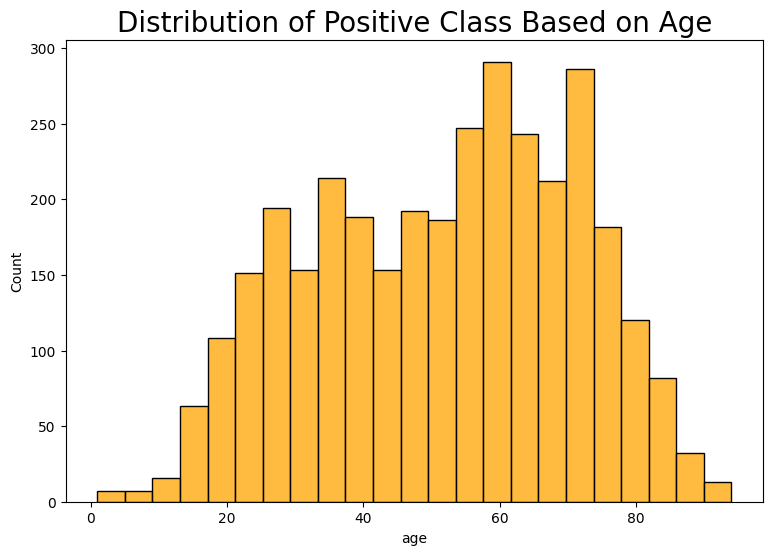

In [18]:
plt.figure(figsize=(9,6))
sns.histplot(x='age',data=positive_df,color='orange')
plt.title("Distribution of Positive Class Based on Age",{'fontsize':20});

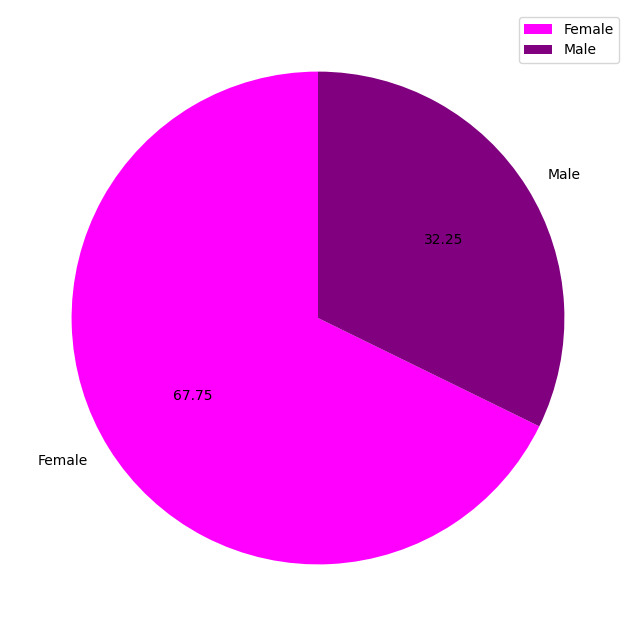

In [19]:
plt.figure(figsize=(10,8))
plt.pie(x=positive_df.sex.value_counts(),
        labels=['Female','Male'],
        startangle = 90,
        colors=['magenta','purple'],
        autopct='%.2f'
       );
plt.legend();

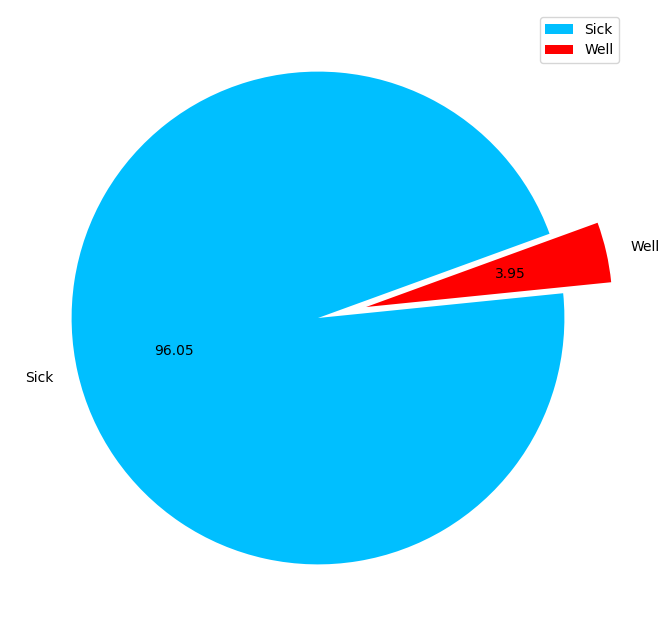

In [20]:
plt.figure(figsize=(8,8))
plt.pie(x=positive_df.sick.value_counts(),
        labels=['Sick','Well'],
        startangle = 20,
        colors=['deepskyblue','red'],
        autopct='%.2f',
        explode=[0,0.2]
       );
plt.legend();

In [21]:
X = thyroid_df.drop('Label',axis=1)
y = thyroid_df.Label

In [22]:
s_encoder = LabelEncoder()
si_encoder = LabelEncoder()
preg_encoder = LabelEncoder()
th_encoder = LabelEncoder()
treat_encoder = LabelEncoder()
lith_encoder = LabelEncoder()
g_encoder= LabelEncoder()
tu_encoder = LabelEncoder()

In [23]:
X['sex'] = s_encoder.fit_transform(X.sex)
X['I131 treatment'] = treat_encoder.fit_transform(X['I131 treatment'])
X['sick'] = si_encoder.fit_transform(X.sick)
X['pregnant'] = preg_encoder.fit_transform(X.pregnant)
X['thyroid surgery'] = th_encoder.fit_transform(X['thyroid surgery'])
X['lithium'] = lith_encoder.fit_transform(X['lithium'])
X['goitre'] = g_encoder.fit_transform(X['goitre'])
X['tumor'] = tu_encoder.fit_transform(X['tumor'])

In [24]:
def func(df):
    if df == 'P':
        return 1
    else:
        return 0

In [25]:
y = y.apply(func)

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [27]:
smote = SMOTE(random_state=11)

x_smote, y_smote = smote.fit_resample(X_train, y_train)

In [28]:
print("Shape before the Oversampling : ",X_train.shape)
print("Shape after the Oversampling : ",x_smote.shape)

Shape before the Oversampling :  (2896, 14)
Shape after the Oversampling :  (5340, 14)


In [29]:
scalr = MinMaxScaler()
x_smote.TT4 = scalr.fit_transform(x_smote[['TT4']])
x_smote.age = scalr.fit_transform(x_smote[['age']])
x_smote.FTI = scalr.fit_transform(x_smote[['FTI']])

In [30]:
models = {
    LogisticRegression(max_iter=500):'Logistic Regression',
    SVC():"Support Vector Machine",
    RandomForestClassifier():'Random Forest'
}
for m in models.keys():
    m.fit(x_smote,y_smote)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

Accuracy Score for Logistic Regression is :  92.95580110497238 %
Accuracy Score for Support Vector Machine is :  7.458563535911603 %
Accuracy Score for Random Forest is :  92.5414364640884 %


In [31]:
for model,name in models.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}")  
    print("----------------------------------------------------------")
    print(classification_report(y_test,y_pred))
    print("----------------------------------------------------------")

Classification Report for Logistic Regression
----------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.06      0.11        54
           1       0.93      1.00      0.96       670

    accuracy                           0.93       724
   macro avg       0.96      0.53      0.53       724
weighted avg       0.93      0.93      0.90       724

----------------------------------------------------------
Classification Report for Support Vector Machine
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.07      1.00      0.14        54
           1       0.00      0.00      0.00       670

    accuracy                           0.07       724
   macro avg       0.04      0.50      0.07       724
weighted avg       0.01      0.07      0.01       724

----------------------------------------------------------
Classification 

In [32]:
rf = RandomForestClassifier()
rf.fit(x_smote,y_smote)
rf.score(X_test,y_test)

0.9295580110497238

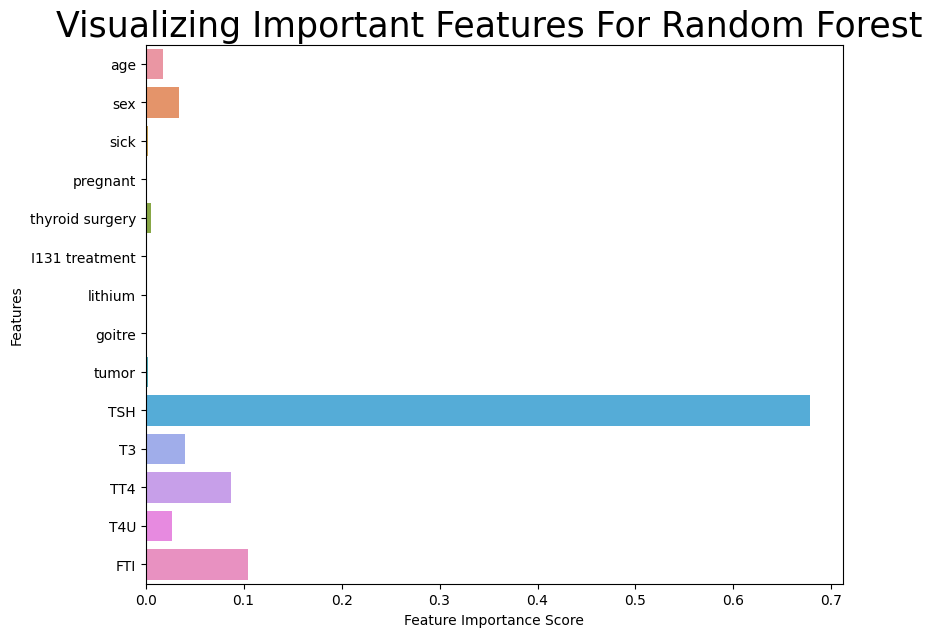

In [33]:
plt.figure(figsize=(9,7))
feature_imp1 = rf.feature_importances_
sns.barplot(x=feature_imp1, y=X.columns)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features For Random Forest ",{'fontsize':25})
plt.show();

In [34]:
x_smote.drop(['sick', 'pregnant', 'I131 treatment',
              'lithium', 'goitre', 'tumor'], axis=1, inplace=True)
X_test.drop(['sick', 'pregnant', 'I131 treatment',
              'lithium', 'goitre', 'tumor'], axis=1, inplace=True)

In [35]:
new_rf = RandomForestClassifier()
new_rf.fit(x_smote,y_smote)
new_rf.score(X_test,y_test)

0.925414364640884

In [36]:
thyroid_df.head()

,age,sex,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Label
0,41,F,f,f,f,f,f,f,f,1.30,2.5000,125,1.140,109,P
1,23,F,f,f,f,f,f,f,f,4.10,2.0000,102,0.995,110,P
2,46,M,f,f,f,f,f,f,f,0.98,2.0135,109,0.910,120,P
3,70,F,f,f,f,f,f,f,f,0.16,1.9000,175,0.995,110,P
4,70,F,f,f,f,f,f,f,f,0.72,1.2000,61,0.870,70,P


In [40]:
import pickle
pickle.dump(rf,open('thyroid_1_model.pkl','wb'))

In [41]:
from flask import Flask,render_template,request
import numpy as np
import pickle
import pandas as pd

In [42]:
model=pickle.load(open("/content/thyroid_1_model.pkl",'rb'))
le=pickle.load(open("thyroid_1_model.pkl",'rb'))

app=Flask(__name__)

In [ ]:
!pip install flask
from flask import Flask, request, render_template
import sklearn
import pickle
import pandas as pd

app = Flask(__name__)
model = pickle.load(open("thyroid_1_model.pkl", "rb"))

@app.route("/")
def home():
    return render_template("index.html")


@app.route("/predict", methods = ["GET", "POST"])
def predict():
    if request.method == "POST":
        Age = int(request.form["age"])
        T3 = float(request.form["T3"])
        TT4 = float(request.form["TT4"])
        T4U = float(request.form["T4U"])
        FTI = float(request.form["FTI"])
        sex = request.form['sex']
        if (sex == "sex_M"):
            sex_M = 1
        else:
            sex_M = 0

        sick = request.form['sick']
        if (sick == 'sick_t'):
            sick_t = 1
        else:
            sick_t = 0

        pregnant = request.form['pregnant']
        if (pregnant == 'pregnant_t'):
            pregnant_t = 1
        else:
            pregnant_t = 0

        thyroid_surgery = request.form['thyroid_surgery']
        if (thyroid_surgery == 'thyroid_surgery_t'):
            thyroid_surgery_t = 1
        else:
            thyroid_surgery_t = 0

        goitre = request.form['goitre']
        if(goitre == 'goitre_t'):
            goitre_t = 1
        else:
            goitre_t = 0

        tumor = request.form['tumor']
        if (tumor == 'tumor_t'):
            tumor_t = 1
        else:
            tumor_t = 0

       
        prediction = model.predict([[Age,
                                     T3,
                                     TT4,
                                     T4U,
                                     FTI,
                                     sex_M,
                                     sick_t,
                                     pregnant_t,
                                     thyroid_surgery_t,
                                     goitre_t,
                                     tumor_t]])

    output = prediction[0]

    if output == 0:
        return render_template('index.html', prediction_text='Thyroid_Result : Hyperthyroid')
    elif output == 1:
        return render_template('index.html', prediction_text='Thyroid_Result : Hypothyrid')
    elif output == 2:
        return render_template('index.html', prediction_text= 'Thyroid_Result : Negative')
    else:
        return render_template('index.html', prediction_text='Thyroid_Result : Sick')


if __name__ == '__main__':
    app.run(debug=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
